# WeRateDogs - Wrangling Data 

## Table of Contents
* [Data wrangling](#wrangle)
 * [Gather the data](#gather)
 * [Assess the data](#assess)
 * [Clean the data](#clean)


* [Store the data](#store)


* [Analyze and visualize wrangled data](#analyze)

<a id='wrangle'></a>
## Data wrangling

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import requests
import tweepy # works with python 2 only
import json

from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

<a id='gather'></a>
## Gather the data 

In [2]:
# the `WeRateDogs` Twitter archive, file downloaded from Udacity's site
# saved as a Pandas dataframe

tarchive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# the tweet image predictions file is downloaded automatically
# from Udacity servers, using Requests library

url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r=requests.get(url)

# save the requests object as a Pandas dataframe
open('image-predictions.tsv', 'wb').write(r.content)
img_preds = pd.read_table('image-predictions.tsv')

In [4]:
# API keys, secrets and tokens are not included, 
# they are replaced with placeholders

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

# create an API object to gather Twitter data
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
# extract the tweet ids from the Twitter archive and store them in a list
tweet_id_list = tarchive["tweet_id"].tolist()

In [ ]:
# create a text file to store the data downloaded from Twitter server
file_tweets = open('tweet_json.txt','w+')

# for each tweet ID, write its JSON data to the text file
# with each tweet's JSON data on its own line

for i in range(0, len(tweet_id_list)):
    try:
        tweet_data = api.get_status(tweet_id_list[i], tweet_mode='extended')
        # need to use _json property that contains json serializable response data
        json.dump(tweet_data._json, file_tweets) 
        # include line separator after each tweet
        file_tweets.write('\n')
    except:
        continue
        

In [7]:
# for loop to read the JSON file and write each entry in a list

tweets_list=[]
file_tweet = open('tweet_json.txt', 'r+')

for entry in file_tweet:
    try:
        tweet_entry = json.loads(entry)
        tweets_list.append(tweet_entry)
    except:
        continue
    
file_tweet.close()


In [8]:
# write the tweets_list in a Pandas dataframe
df = pd.DataFrame(tweets_list)

# extract the three columns id, retweet_count, favorite_count
tweets_df = df[['id', 'retweet_count', 'favorite_count']]

# check for success
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


<a id='assess'></a>
# Assess the data 

In [9]:
# option to display full content of columns in the dataframes
pd.set_option('display.max_colwidth', -1)

#### tarchive -- enhanced twitter archive

In [10]:
tarchive.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [11]:
tarchive.tail(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097616637952/photo/1,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910803644416/photo/1,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155909144576/photo/1,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Can stand on stump for what seems like a while. Built that birdhouse? Impressive. Made friends with a squirrel. 8/10 https://t.co/Ri4nMTLq5C,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513787052032/photo/1,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This appears to be a Mongolian Presbyterian mix. Very tired. Tongue slip confirmed. 9/10 would lie down with https://t.co/mnioXo3IfP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000022159362/photo/1,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916733198337/photo/1,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Let's hope this flight isn't Malaysian (lol). What a dog! Almost completely camouflaged. 10/10 I trust this pilot https://t.co/Yk6GHE9tOY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100786774016/photo/1,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a northern speckled Rhododendron. Much sass. Gives 0 fucks. Good tongue. 9/10 would caress sensually https://t.co/ZoL8kq2XFx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193221509120/photo/1,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10,10,the,None,None,None,None


Investigate several entries in the 'expanded_urls' column.

In [12]:
tarchive['expanded_urls'][100]

'https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1,https://twitter.com/dog_rates/status/872820683541237760/photo/1'

In [13]:
tarchive['expanded_urls'][101]

'https://twitter.com/loganamnosis/status/872657584259551233/photo/1'

In [14]:
tarchive['expanded_urls'][1001]

'https://twitter.com/dog_rates/status/747933425676525569/photo/1,https://twitter.com/dog_rates/status/747933425676525569/photo/1,https://twitter.com/dog_rates/status/747933425676525569/photo/1'

In [15]:
# define the string that contains the correct url for WeRateDogs

url_string = tarchive['expanded_urls'][1][0:37]
url_string

'https://twitter.com/dog_rates/status/'

In [16]:
# create a list of expanded_urls, labelled by their 'tweet_id'
# that do not contain the correct url 

invalid_urls = []
for i in range(0, len(tarchive)):
    if str(tarchive['expanded_urls'][i]).find(url_string) == -1:
        invalid_urls.append([tarchive['expanded_urls'][i],tarchive['tweet_id'][i]])
len(invalid_urls)

217

In [17]:
tarchive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
tarchive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [19]:
tarchive[tarchive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None


In [20]:
# string search to determine if decimal rating numerators are to be found in the tweet text

tarchive[tarchive.text.str.contains(r"\d+\.\d*\/\d+")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,None,None,None,None,None


In [21]:
tarchive['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [22]:
# subset of denominators that are not 10
tarchive[tarchive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

In [23]:
tarchive['name'].value_counts()

None         745
a            55 
Charlie      12 
Cooper       11 
Lucy         11 
Oliver       11 
Penny        10 
Lola         10 
Tucker       10 
Winston      9  
Bo           9  
the          8  
Sadie        8  
Daisy        7  
Toby         7  
Bailey       7  
Buddy        7  
an           7  
Stanley      6  
Koda         6  
Scout        6  
Jax          6  
Dave         6  
Leo          6  
Bella        6  
Jack         6  
Milo         6  
Rusty        6  
Oscar        6  
Gus          5  
            ..  
Tove         1  
Glacier      1  
Pip          1  
Zoe          1  
Cilantro     1  
Jennifur     1  
Olaf         1  
Teddy        1  
Socks        1  
Snoop        1  
Lenox        1  
Jeremy       1  
Zooey        1  
Todo         1  
Kanu         1  
Ember        1  
Steve        1  
Laika        1  
Eazy         1  
Obi          1  
Kane         1  
Finnegus     1  
Alexander    1  
Meatball     1  
Zara         1  
Bronte       1  
Edgar        1  
Glenn        1

In [24]:
 tarchive.groupby('name').count() 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
name,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
Ace,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Acro,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Adele,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Aja,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Akumi,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Al,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
Albert,2,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2


In [25]:
tarchive[tarchive['name'] =='None'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 5 to 2355
Data columns (total 17 columns):
tweet_id                      745 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     745 non-null object
source                        745 non-null object
text                          745 non-null object
retweeted_status_id           65 non-null float64
retweeted_status_user_id      65 non-null float64
retweeted_status_timestamp    65 non-null object
expanded_urls                 686 non-null object
rating_numerator              745 non-null int64
rating_denominator            745 non-null int64
name                          745 non-null object
doggo                         745 non-null object
floofer                       745 non-null object
pupper                        745 non-null object
puppo                         745 non-null object
dtypes: float64(4), int64(3), object(10)
memory 

In [26]:
tarchive['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [27]:
tarchive['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [28]:
tarchive['pupper'].value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [29]:
tarchive['puppo'].value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [30]:
doggo_pupper_df = tarchive[(tarchive['pupper'] == 'pupper') & (tarchive['doggo'] == 'doggo')]
doggo_pupper_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

In [31]:
list(doggo_pupper_df['text'])

['This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 'Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 'Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
 "This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
 "This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd",
 'Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u',
 'RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda',
 'RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC',
 'Meet Maggie &amp; L

In [32]:
doggo_puppo_df = tarchive[(tarchive['puppo'] == 'puppo') & (tarchive['doggo'] == 'doggo')]
doggo_puppo_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,doggo,None,None,puppo


In [33]:
list(doggo_puppo_df['text'])

["Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel"]

In [34]:
doggo_floofer_df = tarchive[(tarchive['floofer'] == 'floofer') & (tarchive['doggo'] == 'doggo')]
doggo_floofer_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [35]:
list(doggo_floofer_df['text'])

["At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"]

#### tweets_df -- additional data via Twitter API

In [36]:
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8613,38880
1,892177421306343426,6329,33300
2,891815181378084864,4202,25092
3,891689557279858688,8729,42255
4,891327558926688256,9498,40404


In [37]:
tweets_df.tail()

,id,retweet_count,favorite_count
2340,666049248165822465,40,109
2341,666044226329800704,141,300
2342,666033412701032449,44,125
2343,666029285002620928,47,130
2344,666020888022790149,520,2565


In [38]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
id                2345 non-null int64
retweet_count     2345 non-null int64
favorite_count    2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [39]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3033.655011,8085.333049
std,6.833642e+16,5045.811526,12163.347708
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,607.000000,1405.000000
50%,7.189392e+17,1418.000000,3544.000000
75%,7.986979e+17,3535.000000,9998.000000
max,8.924206e+17,77544.000000,143702.000000


#### img_preds -- image predictions file

In [40]:
img_preds.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [41]:
img_preds.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


* tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
* pi is the algorithm's #i prediction for the image in the tweet 
* pi_conf is how confident the algorithm is in its #i prediction 
* pi_dog is whether or not the #i prediction is a breed of dog 

In [42]:
img_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [43]:
img_preds.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
904,700143752053182464,https://pbs.twimg.com/media/CbdpBmLUYAY9SgQ.jpg,1,golden_retriever,0.532460,True,crossword_puzzle,0.103796,False,binder,0.100371,False
280,671115716440031232,https://pbs.twimg.com/media/CVBILUgVAAA1ZUr.jpg,1,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False
1193,740214038584557568,https://pbs.twimg.com/media/CkXEu2OUoAAs8yU.jpg,1,Chesapeake_Bay_retriever,0.586414,True,Labrador_retriever,0.189782,True,vizsla,0.067607,True
1384,765719909049503744,https://pbs.twimg.com/media/CqBiMAgWAAEJKgI.jpg,1,golden_retriever,0.969518,True,Labrador_retriever,0.021696,True,Border_terrier,0.002075,True
1355,760290219849637889,https://pbs.twimg.com/ext_tw_video_thumb/760289324994879489/pu/img/3ItvBEoo4aebPfvr.jpg,1,Old_English_sheepdog,0.302200,True,Lhasa,0.258803,True,briard,0.179200,True


In [44]:
img_preds['p1_dog'].value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [45]:
img_preds['p2_dog'].value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [46]:
img_preds['p3_dog'].value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

In [47]:
len(img_preds['p1'].value_counts())

378

In [48]:
len(img_preds['p2'].value_counts())

405

In [49]:
len(img_preds['p3'].value_counts())

408

In [50]:
img_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [51]:
img_preds[img_preds['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,1.459380e-02,False,golden_retriever,7.958960e-03,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
22,666337882303524864,https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg,1,ox,0.416669,False,Newfoundland,2.784070e-01,True,groenendael,1.026430e-01,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,1.041090e-01,True,dingo,6.207120e-02,False
43,666776908487630848,https://pbs.twimg.com/media/CUDeDoWUYAAD-EM.jpg,1,seat_belt,0.375057,False,miniature_pinscher,1.671750e-01,True,Chihuahua,8.695060e-02,True


### Quality issues 

**tarchive -- enhanced twitter archive**
* there are 181 entries that are retweets
* there are 59 entries that correspond to tweets with no images ('expanded_urls' is null)
* columns 'in_reply_to_status_id', 'retweeted_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id' consist mostly of NaN entries
* in 'in_reply_to_status_id', 'retweeted_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id' the few available ids are in scientific notation 
* not all the links in the 'expanded_urls' correspond to the WeRateDogs site
* numerous inconsistencies in the 'name' such as missing names, invalid names, etc.
* the missing names are displayed as 'None' (string) not as None (no value)
* some tweets are about more than one dog and have multiple dog stages
* some entries with multiple dog stages correspond to one dog, such as doggo-puppo, doggo-floofer, Dido, Bones, while Pinot is a hedgehog
* there are a few 'rating_numerator' values that are not 10, some correspond to incorrectly recorded ratings
* there are several rating denominators that are not propertly recorded, due to non-integer values in the tweet text
* 'tweet_id' is an integer, string is more appropriate 
* dog stages columns are all strings, should be categorical
* 'timestamp' and 'retweeted_status_timestamp' are not datetime Python objects

**tweets_df -- additional data via Twitter API**
* the tweet identification is stored in column 'id' in 'tweets_df' instead of 'tweet_id'
* there are 2345 entries in 'tweets_df' as compared with 2356 in 'tarchive'
* 'id' is an integer, string is more appropriate

**img_preds -- image predictions file**
* there are 2075 entries in 'img_preds' as compared with 2356 in 'tarchive'
* the predicted dog breeds (as recorded in columns 'p1', 'p2' and 'p3') are given in both upper case and lower case 
* 'tweet_id' is an integer, string is more appropriate

### Tidiness issues
* dog stages are in different columns in 'tarchive'
* data is stored in three dataframes 

<a id='clean'></a>
# Clean the data

In [52]:
# make copies of the three dataframes
tarchive_clean = tarchive.copy()
img_preds_clean = img_preds.copy()
tweets_df_clean = tweets_df.copy()

### There are 181 entries that are retweets.

#### Define
Remove the 181 rows where the 'retweeted_status_id' is not null, by keeping those rows where the 'retweeted_status_id' is null. 

#### Clean

In [53]:
tarchive_clean = tarchive_clean[tarchive_clean['retweeted_status_id'].isnull()]

#### Test

In [54]:
tarchive_clean['retweeted_status_id'].value_counts()


Series([], Name: retweeted_status_id, dtype: int64)

### There are 59 entries that correspond to tweets with no images ('expanded_urls' is null).

#### Define
Remove the rows that have no images, these are the rows where the 'expanded_urls' is null.

#### Clean

In [55]:
tarchive_clean = tarchive_clean.dropna(subset=['expanded_urls'])

#### Test

In [56]:
tarchive_clean['expanded_urls'].isnull().values.any()

False

### Columns 'in_reply_to_status_id', 'retweeted_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id' consist mostly of NaN entries

#### Define
Remove columns 'in_reply_to_status_id', 'retweeted_status_id', 'in_reply_to_user_id',  'retweeted_status_user_id' and 'retweeted_status_timestamp' from 'tarchive_clean' dataframe.

#### Remark
* Removing the columns will also take care of the very few available tweet_ids in scientific notation in these columns. 

#### Clean

In [57]:
# drop columns 
tarchive_clean = tarchive_clean.drop(['in_reply_to_status_id', 'retweeted_status_id', 
                                      'in_reply_to_user_id', 'retweeted_status_user_id', 
                                      'retweeted_status_timestamp'], axis=1)

#### Test

In [58]:
list(tarchive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Dog stages are in different columns in 'tarchive'.

#### Define
Combine the four columns 'doggo', 'floofer', 'pupper', 'puppo' into a single column named 'dog_stages'. 
* Collect all the entries from these four columns for each row, into single concatenated strings, using lambda and join. 
* Determine the possible string combinations. Extract the dog stage information from these strings. 
* Drop the columns ''doggo', 'floofer', 'pupper', 'puppo'.

*Note*: The 'melt' function is another option here. The disadvantage of the 'melt' is that it quadruples the number of rows in the dataframe for a relatively small number of non-null entries.

#### Clean

In [59]:
# combine the entries from the four dogs stages columns into a single string
# store these strings in a new column 'dog_stages'

tarchive_clean['dog_stages'] = tarchive_clean[['doggo',
            'floofer', 'pupper', 'puppo']].apply(lambda x: ''.join(x), axis=1)


In [60]:
# determine the possible string combinations in the 'dog_stages' column

tarchive_clean['dog_stages'].value_counts()

NoneNoneNoneNone        1779
NoneNonepupperNone      222 
doggoNoneNoneNone       72  
NoneNoneNonepuppo       23  
doggoNonepupperNone     10  
NoneflooferNoneNone     9   
doggoflooferNoneNone    1   
doggoNoneNonepuppo      1   
Name: dog_stages, dtype: int64

In [61]:
# map the extracted strings to dogstages
stages_strings = {'NoneNoneNoneNone': None,
                  'NoneNonepupperNone': 'pupper',
                  'doggoNoneNoneNone' : 'doggo',
                  'NoneNoneNonepuppo' : 'puppo',
                  'doggoNonepupperNone' : 'doggo-pupper',
                  'NoneflooferNoneNone' : 'floofer',
                  'doggoflooferNoneNone': 'doggo-floofer',
                  'doggoNoneNonepuppo' : 'doggo-puppo'}

# function to apply
def dog_stage(entry):
    if entry['dog_stages'] in stages_strings.keys():
        updated_dog_stage = stages_strings[entry['dog_stages']]
        return updated_dog_stage
            
tarchive_clean['dog_stages'] = tarchive_clean.apply(dog_stage, axis=1)

In [62]:
# drop the columns 'doggo', 'floofer', 'pupper', 'puppo'

tarchive_clean = tarchive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [63]:
tarchive_clean['dog_stages'].value_counts()

pupper           222
doggo            72 
puppo            23 
doggo-pupper     10 
floofer          9  
doggo-floofer    1  
doggo-puppo      1  
Name: dog_stages, dtype: int64

In [64]:
list(tarchive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_stages']

### Tweet identification is stored in column 'id' in 'tweets_df' instead of 'tweet_id'

#### Define
Rename the column 'id' in 'tweets_df_clean' to 'tweet_id'.

#### Clean

In [65]:
tweets_df_clean.rename(columns={'id':'tweet_id'}, inplace=True);

#### Test

In [66]:
list(tweets_df_clean)

['tweet_id', u'retweet_count', u'favorite_count']

### Data is stored in three dataframes. 

#### Define
Merge the three dataframes 'tarchive_clean', 'tweets_df_clean' and 'img_preds_clean' on the common column 'tweet_id'. Name the new dataframe 'ratedogs_df'.

#### Clean

In [67]:
ratedogs_df = tarchive_clean.merge(tweets_df_clean,on='tweet_id').merge(img_preds_clean,on='tweet_id')

#### Test

In [68]:
ratedogs_df.sample(4);

In [69]:
ratedogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
dog_stages            306 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float6

### Remarks
Merging the three dataframes into a single one also resolved the following quality issues:
* there are 2345 entries in 'tweets_df' as compared with 2356 in 'tarchive'
* there are 2075 entries in 'img_preds' as compared with 2356 in 'tarchive'
* not all the links in the 'expanded_urls' correspond to the WeRateDogs site

#### Test

In [70]:
# when merging the dataframes the entries with invalid urls are not included
invalid_urls_merged = []
for i in range(0, len(ratedogs_df)):
    if str(ratedogs_df['expanded_urls'][i]).find(url_string) == -1:
        invalid_urls_merged.append([ratedogs_df['expanded_urls'][i],ratedogs_df['tweet_id'][i]])
len(invalid_urls_merged)

0

### Missing names are recorded as 'None' (string) instead of the value None.

#### Define
Replace 'None' entries in column 'name' with the Python value None.

#### Clean

In [71]:
ratedogs_df['name'].replace('None', None, inplace=True);

#### Test

In [72]:
ratedogs_df['name'].value_counts()[0:10]

a          84
Cooper     16
Penny      15
Daisy      15
an         15
Lucy       15
Sadie      14
Charlie    14
Toby       13
Scout      12
Name: name, dtype: int64

### Numerous inconsistencies in the 'name' column, invalid and missing names.

#### Define
* Use for loop to replace the lower case entries in the 'name' column with the word 'missing'. 
* Collect those rows that have 'missing' entry in the 'name' column but contain the string 'name?' in the 'text' column. Save these entries in a temporary dataframe 'missing_names_df'. 
* Extract the name from the 'text' column. Split the 'text' on empty spaces and save it in a list called 'list_text'. Get the index of the entry 'named' or 'name' in this list, call it 'named_index' or 'name_index' respectively. Append the entry in 'list_text' that has index 'named_index' + 1 or 'name_index'+ 2 (this corresponds to "... the name is..." in the tweet text) together with the 'tweet_id'.
* Clean the entries in 'mising_names_list' by dropping the period '.' after name.
* Update the 'name' column in the 'ratedogs_df' dataframe with these names.
* Replace missing with None. 
* Replance 'None' with None (as Python value).

#### Clean

In [73]:
# replace lowercase strings in 'name' column with 'missing'

for i in range(0, len(ratedogs_df['name'])):
    if str(ratedogs_df['name'][i])[0].islower():
        ratedogs_df['name'].replace(str(ratedogs_df['name'][i]), 'missing', inplace=True)
        
# create dataset that contains rows that might contain the dog name in 'text'
# and has 'missing' entry in the 'name' column

missing_names_df=ratedogs_df.loc[(ratedogs_df['name'] == 'missing') 
                              & ratedogs_df['text'].str.contains('name')]

# for loop extracts the name from 'text' column and saves it in a list

missing_names_list=[]

for i in range(0, len(missing_names_df)):
    list_text = list(missing_names_df['text'])[i].split(' ')
    if 'named' in list_text:
        named_index = list_text.index('named')
        get_tweet_id = list(missing_names_df['tweet_id'])[i]
        dog_name = list_text[named_index + 1]
        missing_names_list.append([get_tweet_id,dog_name])
    if 'name' in list_text:
        name_index = list_text.index('name')
        get_tweet_id = list(missing_names_df['tweet_id'])[i]
        dog_name = list_text[name_index + 2]
        missing_names_list.append([get_tweet_id,dog_name])
    
# drop the period '.' after the dog_name

for entry in missing_names_list:
    entry[1] = entry[1].strip('.')

# record the newly extracted dog names in the merged dataframe 

for i in range(0, len(missing_names_list)):
    get_id = ratedogs_df.loc[ratedogs_df['tweet_id'] == missing_names_list[i][0]]
    ratedogs_df.name.replace(get_id['name'], missing_names_list[i][1], inplace=True)


In [74]:
# replace 'missing' entries in 'name' column with None

ratedogs_df['name'].replace('missing', None, inplace=True);

#### Test

In [75]:
missing_names_list

[[765395769549590528, 'Zoey'],
 [675706639471788032, 'Wylie'],
 [673636718965334016, 'Kip'],
 [671743150407421952, 'Jacob'],
 [671147085991960577, 'Rufus'],
 [670427002554466305, 'Spork'],
 [670361874861563904, 'Cherokee'],
 [670303360680108032, 'Hemry'],
 [669923323644657664, 'Alphred'],
 [669564461267722241, 'Alfredo'],
 [668955713004314625, 'Leroi'],
 [668636665813057536, 'Berta'],
 [668507509523615744, 'Chuk'],
 [668171859951755264, 'Alfonso'],
 [667861340749471744, 'Cheryl'],
 [667773195014021121, 'Jessiga'],
 [667538891197542400, 'Klint'],
 [667470559035432960, 'Kohl'],
 [667177989038297088, 'Daryl'],
 [666983947667116034, 'Pepe'],
 [666781792255496192, 'Octaviath'],
 [666701168228331520, 'Johm']]

In [76]:
ratedogs_df.groupby('name').count();

In [77]:
ratedogs_df[ratedogs_df['name']=='Jessiga']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1117,698355670425473025,2016-02-13 03:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jessiga. She's a Tasmanian McCringleberry. Selfies make her uncomfortable. 10/10 would pet in time of need https://t.co/MrdPZz1CGk,https://twitter.com/dog_rates/status/698355670425473025/photo/1,10,10,Jessiga,None,493,...,1,pug,0.990191,True,Pekinese,0.002799,True,sunglasses,0.001310,False
1896,667773195014021121,2015-11-20 18:35:10 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10 https://t.co/ZU0i0KJyqD,https://twitter.com/dog_rates/status/667773195014021121/photo/1,8,10,Jessiga,None,59,...,1,West_Highland_white_terrier,0.360465,True,pug,0.093494,True,ice_bear,0.069038,False


### Not every tweet is about one dog only, some tweets are about more than one dog and they have multiple dog stages assessments.

#### Define

* Update 'dog_stages' from 'doggo-floofer' to 'floofer'.
* Update 'dog_stages' from 'doggo-puppo' to 'puppo'.
* In the subset of 'dog_stages' labelled as 'doggo-pupper', update Dido to pupper, Bones to pupper and Pinot to None. 
* Also update entry with tweet_id 751583847268179968 (index 704) to 'doggo'.

#### Remark
The remaining entries (except for entry 704) that have 'dog_stages' as 'doggo-pupper' correspond to tweets that are about two dogs each. We leave these entries as they are. Replace the dog names with None for these entries.

#### Clean

In [78]:
# replace 'doggo-floofer' with 'floofer'
ratedogs_df['dog_stages'].replace('doggo-floofer', 'floofer', inplace=True)

# replace 'doggo-puppo' with 'puppo'
ratedogs_df['dog_stages'].replace('doggo-puppo', 'puppo', inplace=True)

In [79]:
# extract the entries corresponding to 'doggo-pupper' dog_stages
ratedogs_df[ratedogs_df['dog_stages'] =='doggo-pupper'];

In [80]:
# update Dido and Bones to pupper, Pinot to None and entry 704 to doggo

ratedogs_df.loc[(ratedogs_df['tweet_id'] == 817777686764523521), ['dog_stages']] = 'pupper'
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 801115127852503040), ['dog_stages']] = 'pupper'
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 785639753186217984), ['dog_stages']] = None
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 751583847268179968), ['dog_stages']] = 'doggo'

In [81]:
# replace Maggie and Theodore  with None, since these tweets are about two dogs each 

ratedogs_df.loc[(ratedogs_df['tweet_id'] == 759793422261743616), ['name']] = None
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 741067306818797568), ['name']] = None

#### Test

In [82]:
ratedogs_df['dog_stages'].value_counts()

pupper          205
doggo           64 
puppo           23 
floofer         8  
doggo-pupper    5  
Name: dog_stages, dtype: int64

In [83]:
# the remaining 'doggo-pupper' entries correspond to tweets about two dogs, 
ratedogs_df[ratedogs_df['dog_stages'] =='doggo-pupper'];

### There are a few 'rating_denominator' values that are not 10.

#### Define
* Correct several ratings where the denominators are not 10. The corrections include both numerator and denominator updates. Use the 'text' entry to do this.
* Remove a tweet with no rating.

##### Clean

In [84]:
# isolate the entries with rating denominator not 10

pd.set_option('display.max_colwidth', -1)
other_denom = ratedogs_df[ratedogs_df['rating_denominator'] != 10]
other_denom

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
323,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,Sunny,None,3623,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
385,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,1612,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
662,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,Brandonald,None,2476,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
800,740373189193256964,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,Baloo,None,14653,...,3,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
848,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,Solomon,None,1391,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
891,722974582966214656,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,Jangle,None,1718,...,1,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True
925,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,241,...,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
946,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,Kanu,None,812,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
970,710658690886586372

In [85]:
# remove the entry that corresponds to the tweet with no rating, with index 385

ratedogs_df= ratedogs_df[ratedogs_df['tweet_id'] != 810984652412424192]


In [86]:
# update ratings for selected entries, based on the tweet text

# update rating for entry 800
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 740373189193256964), ['rating_numerator']] = 14
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 740373189193256964), ['rating_denominator']] = 10

# update rating for entry 891
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 722974582966214656), ['rating_numerator']] = 13
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 722974582966214656), ['rating_denominator']] = 10


# update rating for entry 925
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 716439118184652801), ['rating_numerator']] = 11
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 716439118184652801), ['rating_denominator']] = 10

# update rating for entry 1328
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 682962037429899265), ['rating_numerator']] = 10
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 682962037429899265), ['rating_denominator']] = 10

# update rating for entry 1973
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 666287406224695296), ['rating_numerator']] = 9
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 666287406224695296), ['rating_denominator']] = 10

##### Test

In [87]:
ratedogs_df[ratedogs_df['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
323,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,Sunny,None,3623,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
662,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,Brandonald,None,2476,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
848,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,Solomon,None,1391,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
946,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,Kanu,None,812,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
970,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80,80,Sora,None,618,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
988,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45,50,Penny,None,701,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1054,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60,50,Stanley,None,1004,...,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
1130,697463031882764288,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44,40,Blipson,None,1513,...,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
1302,684225744407494656,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407

In [88]:
ratedogs_df['rating_denominator'].value_counts()

10     1981
80     2   
50     2   
170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
70     1   
40     1   
Name: rating_denominator, dtype: int64

### There are several rating numerators that are incorrect due to non-integer values in the text entry. 

#### Define
* Identify the incorrect rating numerators that are due to non-integer ratings in the tweet text.
* Update each rating numerator individually (there are only 4 such entries), by assigning the integer part of the decimal number.

#### Clean

In [89]:
# determine if the tweet text contains a non-integer written as float
ratedogs_df[ratedogs_df.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
39,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,10071,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
503,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,6877,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
553,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,pupper,1830,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1374,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,26,10,Percy,None,530,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


In [90]:
# update each numerator using the information from the tweet text

ratedogs_df.loc[(ratedogs_df['tweet_id'] == 883482846933004288), ['rating_numerator']] = 13
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 786709082849828864), ['rating_numerator']] = 9
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 778027034220126208), ['rating_numerator']] = 11
ratedogs_df.loc[(ratedogs_df['tweet_id'] == 680494726643068929), ['rating_numerator']] = 11


#### Test

In [91]:
# display the entries with updated rating numerators 
ratedogs_df[ratedogs_df.text.str.contains(r"(\d+\.\d*\/\d+)")]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
39,883482846933004288,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13,10,Bella,None,10071,...,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
503,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9,10,Logan,None,6877,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
553,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11,10,Sophie,pupper,1830,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
1374,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11,10,Percy,None,530,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True


### The predicted dog breeds from columns 'p1', 'p2' and 'p3' are recorded in both upper case and lower case.

#### Define
* Rewrite all strings in columns 'p1', 'p2' and 'p3' in lower case.

#### Clean


In [92]:
ratedogs_df.p1 = ratedogs_df.p1.str.lower()
ratedogs_df.p2 = ratedogs_df.p2.str.lower()
ratedogs_df.p3 = ratedogs_df.p3.str.lower()

#### Test

In [93]:
# preview a random sample of 4 entries from the predictions columns
ratedogs_df[['p1', 'p2', 'p3']].sample(4)

,p1,p2,p3
1566,slug,ice_lolly,leafhopper
1759,chow,golden_retriever,tibetan_mastiff
863,siamese_cat,saint_bernard,king_penguin
1,chihuahua,pekinese,papillon


### Erroneous datatypes: timestamp, tweet_id and dog_stages.

#### Define
* Change the datatype for timestamp from string to datetime object. 
* Change the datatype for tweet_id from integer to string.
* Change the datatype for dog_stages from string to categorical.

#### Clean

In [94]:
# to datetime
ratedogs_df.timestamp = pd.to_datetime(ratedogs_df.timestamp)

# to string
ratedogs_df.tweet_id = ratedogs_df.tweet_id .astype(str)

# to category
ratedogs_df.dog_stages = ratedogs_df.dog_stages.astype('category') 

#### Test

In [95]:
ratedogs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1993 non-null object
timestamp             1993 non-null datetime64[ns]
source                1993 non-null object
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null int64
rating_denominator    1993 non-null int64
name                  1991 non-null object
dog_stages            305 non-null category
retweet_count         1993 non-null int64
favorite_count        1993 non-null int64
jpg_url               1993 non-null object
img_num               1993 non-null int64
p1                    1993 non-null object
p1_conf               1993 non-null float64
p1_dog                1993 non-null bool
p2                    1993 non-null object
p2_conf               1993 non-null float64
p2_dog                1993 non-null bool
p3                    1993 non-null object
p3_conf               1993 non-

<a id='store'></a>
## Store the data

In [96]:
# store the dataframe as a csv file
ratedogs_df.to_csv('twitter_archive_master.csv', index=False)

<a id='analyze'></a>
## Analyze and visualize the data

In [97]:
# keep only some of the columns for cleaner output
columns_used = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator', 
                'name', 'dog_stages', 'retweet_count', 'favorite_count', 'jpg_url', 
                'p1', 'p1_conf', 'p1_dog',
                'p2', 'p2_conf', 'p2_dog',
                'p3', 'p3_conf', 'p3_dog']
#rdogs = ratedogs_df[columns_used]
rdogs = ratedogs_df[columns_used]

### Looking at outliers: rating denominators not 10 and large rating numerators

In [98]:
# a subset that contains those tweets for which the rating_denominator is not 10
large_denom = rdogs[rdogs['rating_denominator'] != 10]

# columns to be displayed
display_columns = ['tweet_id','rating_numerator', 'rating_denominator', 'p1', 'p1_dog', 'text']

large_denom[display_columns]

,tweet_id,rating_numerator,rating_denominator,p1,p1_dog,text
323,820690176645140481,84,70,west_highland_white_terrier,True,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
662,758467244762497024,165,150,labrador_retriever,True,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
848,731156023742988288,204,170,lakeside,False,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
946,713900603437621249,99,90,golden_retriever,True,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
970,710658690886586372,80,80,soft-coated_wheaten_terrier,True,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
988,709198395643068416,45,50,borzoi,True,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1054,704054845121142784,60,50,great_pyrenees,True,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1130,697463031882764288,44,40,labrador_retriever,True,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1302,684225744407494656,143,130,golden_retriever,True,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"
1303,684222868335505415,121,110,soft-coated_wheaten_terrier,True,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


In [99]:
# the links for the images for the tweets where rating denominator is not 10
large_denom['jpg_url']

323     https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg                                        
662     https://pbs.twimg.com/ext_tw_video_thumb/758467147756691456/pu/img/YTNzjRFDSPNXukmM.jpg
848     https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg                                        
946     https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg                                        
970     https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg                                        
988     https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg                                        
1054    https://pbs.twimg.com/media/CcVOJEcXEAM0FHL.jpg                                        
1130    https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg                                        
1302    https://pbs.twimg.com/media/CX7br3HWsAAQ9L1.jpg                                        
1303    https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg                                        
1435    https://pbs.twimg.com/media/CWe7

#### Observation:
Analyze the text entries and the pictures attached to these tweets. It follows that for all but one (tweet_id= 684225744407494656, index=1301) the denominator represents the number of dogs in the picture multiplied by 10.

In [100]:
# find the largest numerators
rdogs['rating_numerator'].nlargest(20)

726     1776
1718    420 
848     204 
662     165 
1435    144 
1302    143 
1303    121 
946     99  
1494    88  
323     84  
970     80  
1054    60  
988     45  
1130    44  
9       14  
21      14  
36      14  
49      14  
64      14  
95      14  
Name: rating_numerator, dtype: int64

In [101]:
# a subset that contains those tweets for which the rating_numerator is 'large'
large_numerator = rdogs[rdogs['rating_numerator'] > 20]

large_numerator[display_columns]

,tweet_id,rating_numerator,rating_denominator,p1,p1_dog,text
323,820690176645140481,84,70,west_highland_white_terrier,True,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
662,758467244762497024,165,150,labrador_retriever,True,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
726,749981277374128128,1776,10,bow_tie,False,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
848,731156023742988288,204,170,lakeside,False,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
946,713900603437621249,99,90,golden_retriever,True,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
970,710658690886586372,80,80,soft-coated_wheaten_terrier,True,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
988,709198395643068416,45,50,borzoi,True,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1054,704054845121142784,60,50,great_pyrenees,True,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1130,697463031882764288,44,40,labrador_retriever,True,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1302,684225744407494656,143,130,golden_retriever,True,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"


In [102]:
# eliminate those entries that have denominators not 10, they were previously analyzed

subset_large_numerator=large_numerator[large_numerator['rating_denominator']==10]
subset_large_numerator[display_columns]

,tweet_id,rating_numerator,rating_denominator,p1,p1_dog,text
726,749981277374128128,1776,10,bow_tie,False,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1718,670842764863651840,420,10,microphone,False,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY


In [103]:
# the links for the images of tweets in subset_large_denominator
subset_large_numerator['jpg_url']

726     https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
1718    https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg
Name: jpg_url, dtype: object

#### Observation:
Analyze the images linked to these tweets. The one with tweet_id= 749981277374128128, is a of a dog in July 4th 'attire', hence the rating 1776. IN this case we observe that the entry in column 'p1_dog' should be True. The second is a picture of Snoop Dog, which also has a meaningful rating: 420.

## Dog breeds analysis

In [104]:
# the frequency of the dog breeds, based on first prediction
rdogs_p1_val = rdogs['p1'].value_counts()
# keep those breeds that have p1 frequency greater than 21
rdogs_p1_highfreq = rdogs_p1_val[rdogs_p1_val >21]

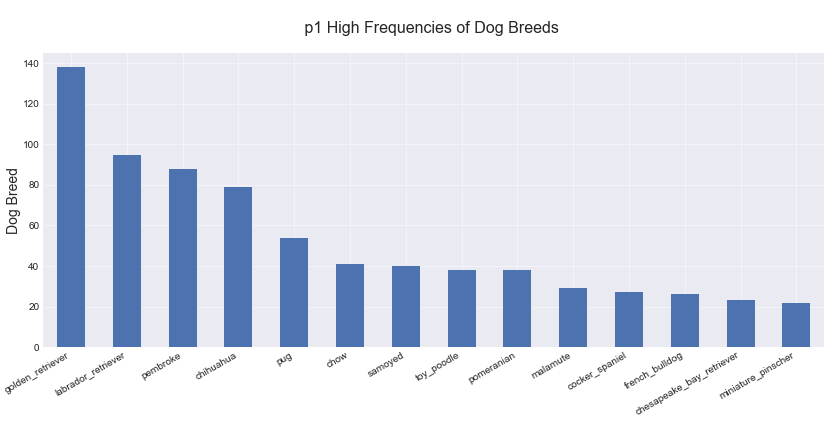

In [105]:
#### a bar chart for the p1 frequencies of the dog breeds

### create the figure in which the bar chart will be drawn
plt.figure(figsize=(28, 12), dpi=36, linewidth=2, frameon=True)

### the bar chart
rdogs_p1_highfreq.plot(kind='bar')

### the title
plt.title('\n p1 High Frequencies of Dog Breeds  \n', fontsize=32)

### the x-labels and ticks
plt.gcf().autofmt_xdate()
plt.xticks(fontsize = 20) 

### the y-labels and ticks
#plt.ylim([5.5, 7])
plt.ylabel('Dog Breed', fontsize=28)
plt.yticks(fontsize=20)

plt.show()

In [106]:
# subset of data that correspond to breed golden_retriever (as predicted by p1)
gretriever = rdogs[rdogs['p1'] == 'golden_retriever']

# look at largest rating numerators 
gretriever['rating_numerator'].nlargest(10)

1302    143
946     99 
275     14 
399     14 
800     14 
14      13 
17      13 
39      13 
41      13 
45      13 
Name: rating_numerator, dtype: int64

In [107]:
# look at smallest rating numerators 
gretriever['rating_numerator'].nsmallest(10)

1615    8 
1817    8 
802     9 
1014    9 
1073    9 
1921    9 
584     10
653     10
784     10
827     10
Name: rating_numerator, dtype: int64

In [108]:
# remove the outliers, values 143 and 99
gretriever_clean = gretriever[gretriever['rating_numerator'] < 90]
# test for success
gretriever_clean['rating_numerator'].nlargest(5)

275    14
399    14
800    14
14     13
17     13
Name: rating_numerator, dtype: int64

In [109]:
# basic statisics 
gretriever_clean.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,p1_conf,p2_conf,p3_conf
count,136.000000,136.0,136.000000,136.000000,136.000000,136.000000,136.000000
mean,11.639706,10.0,3613.051471,12315.397059,0.726270,0.111998,0.044581
std,1.202915,0.0,4361.460561,13024.536985,0.221202,0.096813,0.046928
min,8.000000,10.0,51.000000,192.000000,0.140394,0.001948,0.000453
25%,11.000000,10.0,1175.250000,3520.250000,0.607729,0.037135,0.009008
50%,12.000000,10.0,2244.000000,8134.500000,0.777851,0.090681,0.024669
75%,12.000000,10.0,4250.250000,16075.750000,0.904843,0.167753,0.071905
max,14.000000,10.0,26972.000000,83573.000000,0.993830,0.454937,0.203163


## Retweet and favorite counts analysis

In [110]:
# number statistics for retweet count
rdogs['retweet_count'].describe()

count    1993.000000 
mean     2725.338685 
std      4705.582750 
min      13.000000   
25%      609.000000  
50%      1312.000000 
75%      3132.000000 
max      77544.000000
Name: retweet_count, dtype: float64

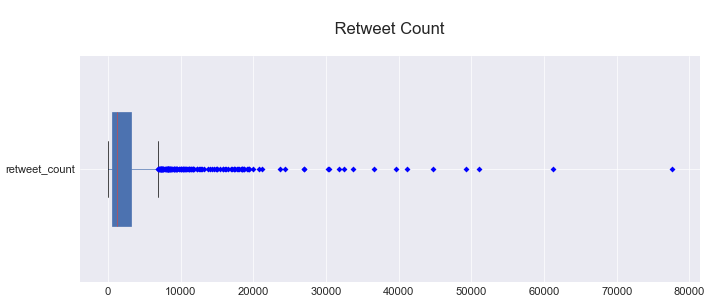

In [111]:
### create the figure in which the box plot will be drawn
plt.figure(figsize=(16,6), dpi=50, linewidth=2, frameon=True)

rdogs_retweet=pd.DataFrame(rdogs['retweet_count'])

### the horizontal boxplot
rdogs_retweet.boxplot(sym='bD', vert=False, widths=.5, patch_artist=True, showfliers=True)

### title and ticks  
plt.title('\n Retweet Count \n', fontsize=24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

In [112]:
# the tweet that corresponds to largest retweet count
rdogs.loc[rdogs['retweet_count'] == 77544 ]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,13,10,Blanket,doggo,77544,128499,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [113]:
# numbers statistics for favorite count
rdogs['favorite_count'].describe()

count    1993.000000  
mean     8871.586051  
std      12595.225005 
min      79.000000    
25%      1926.000000  
50%      4050.000000  
75%      11173.000000 
max      143702.000000
Name: favorite_count, dtype: float64

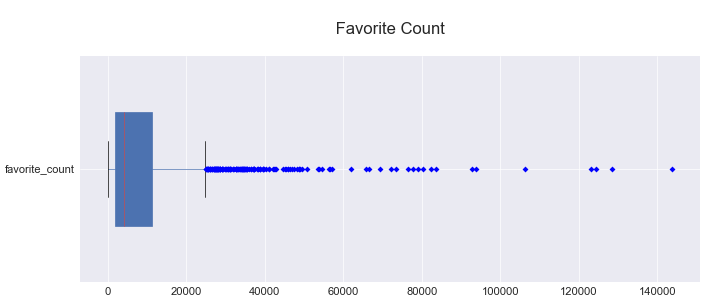

In [114]:
### create the figure in which the box plot will be drawn
plt.figure(figsize=(16,6), dpi=50, linewidth=2, frameon=True)

rdogs_favorite=pd.DataFrame(rdogs['favorite_count'])

### the horizontal boxplot
rdogs_favorite.boxplot(sym='bD', vert=False, widths=.5, patch_artist=True, showfliers=True)

### title and ticks  
plt.title('\n Favorite Count \n', fontsize=24)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

In [115]:
# the tweet with the largest favorite count
rdogs.loc[rdogs['favorite_count'] == 143702 ]

,tweet_id,text,rating_numerator,rating_denominator,name,dog_stages,retweet_count,favorite_count,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,13,10,Albus,puppo,49266,143702,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,lakeland_terrier,0.196015,True,labrador_retriever,0.160329,True,irish_terrier,0.069126,True


In [116]:
### get the mean 'retweet_count', 'favorite_count' values by dog_stages
dog_stages_means = rdogs.groupby(['dog_stages'], as_index=False)['retweet_count','favorite_count'].mean()

### limit the decimals
dog_stages_means = dog_stages_means.round()

### sort the entries in decreasing order of mean 'favorite_count'
dog_stages_means.sort_values(['retweet_count'], ascending=False)

,dog_stages,retweet_count,favorite_count
4,puppo,7018.0,23368.0
0,doggo,6850.0,18857.0
1,doggo-pupper,5384.0,15722.0
2,floofer,4644.0,13449.0
3,pupper,2324.0,7189.0


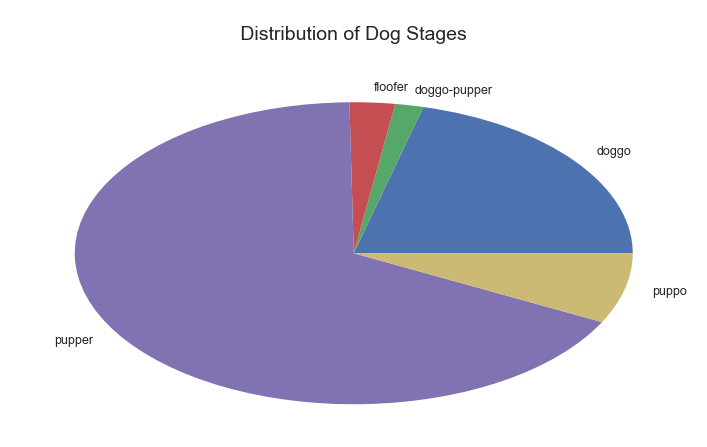

In [118]:
### pie chart for distribution of favorite_count over dog_stages  

### create the figure in which the chart will be drawn
plt.figure(figsize=(18, 10), dpi=50, linewidth=2, frameon=True)

### the pie chart
rdogs.groupby(['dog_stages'])['dog_stages'].count().plot(kind='pie', fontsize=18)
plt.ylabel('')

### the title
plt.title('\n Distribution of Dog Stages \n', fontsize=28)

plt.show()


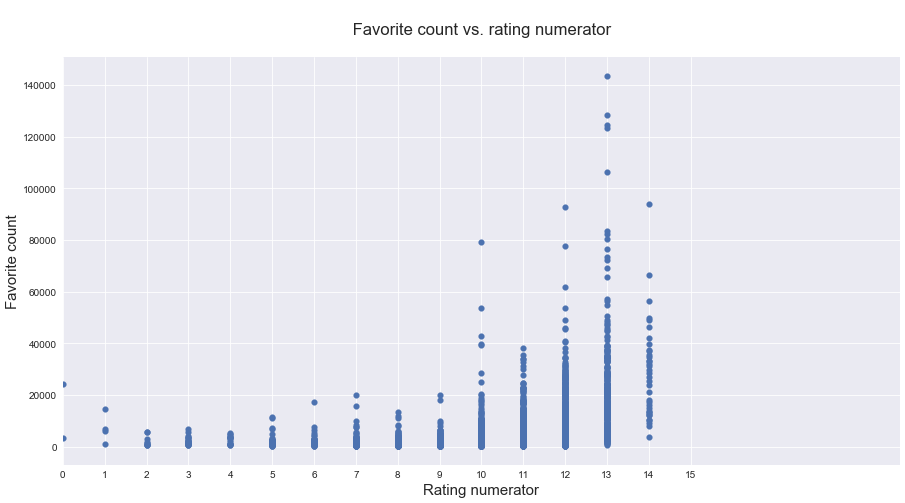

In [119]:
### scatterplot of rating_numerator vs favorite_count

### create the figure in which the scatterplot will be drawn
plt.figure(figsize=(18, 9), dpi=60, linewidth=2, frameon=True)

###the scatter plot
plt.scatter(x= 'rating_numerator', y='favorite_count', data=rdogs);

### the title
plt.title('\n Favorite count vs. rating numerator \n', fontsize=20);

### the labels and ticks, do not include outliers
plt.xlabel('Rating numerator', fontsize=18)
plt.xticks(np.arange(0, 16, step=1), fontsize=12)


plt.xlim(0, 20)
plt.ylabel('Favorite count', fontsize=18)
plt.yticks(fontsize=12)

plt.show()

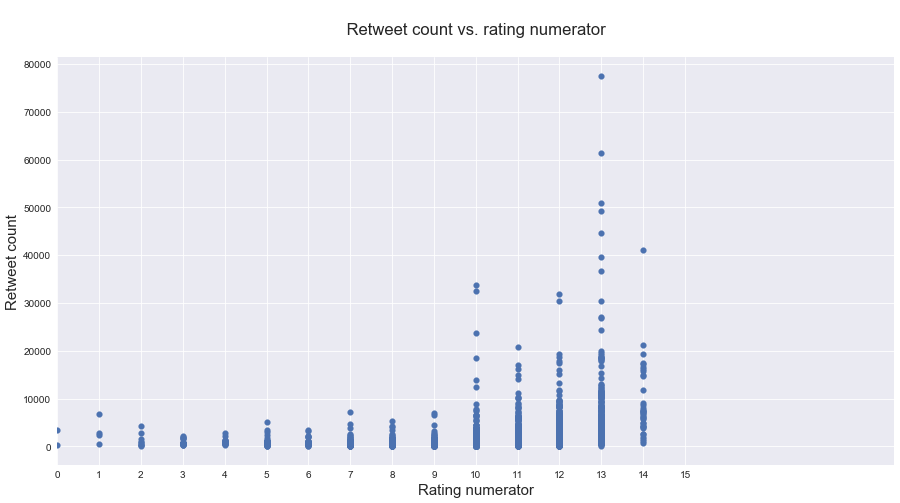

In [120]:
### scatterplot of rating_numerator vs retweet_count

### create the figure in which the scatterplot will be drawn
plt.figure(figsize=(18, 9), dpi=60, linewidth=2, frameon=True)

###the scatter plot
plt.scatter(x= 'rating_numerator', y='retweet_count', data=rdogs);

### the title
plt.title('\n Retweet count vs. rating numerator \n', fontsize=20);

### the labels and ticks, do not include outliers
plt.xlabel('Rating numerator', fontsize=18)
plt.xticks(np.arange(0, 16, step=1), fontsize=12)


plt.xlim(0, 20)
plt.ylabel('Retweet count', fontsize=18)
plt.yticks(fontsize=12)

plt.show()

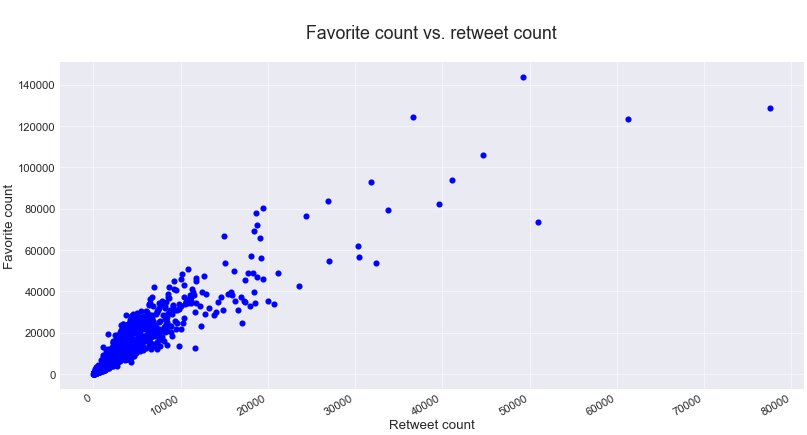

In [121]:
### adjust the seaborn figure style
sns.set_style('darkgrid')

### create the figure in which the line plot will be drawn
plt.figure(figsize=(24, 12), dpi=40, linewidth=2, frameon=True)

### the scatter plot
plt.scatter(rdogs['retweet_count'], rdogs['favorite_count'], color='b', linewidth=4)

### the title
plt.title('\n Favorite count vs. retweet count \n', fontsize=32)

### beautify the x-labels and ticks
plt.gcf().autofmt_xdate()
plt.xticks(fontsize = 20) 
plt.xlabel('Retweet count', fontsize=24)

### the y-labels and ticks
plt.ylabel('Favorite count', fontsize=24)
plt.yticks(fontsize=20)

plt.show()